<a href="https://colab.research.google.com/github/OozyGrub/ai-ga-car/blob/main/GA_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Designing Environment

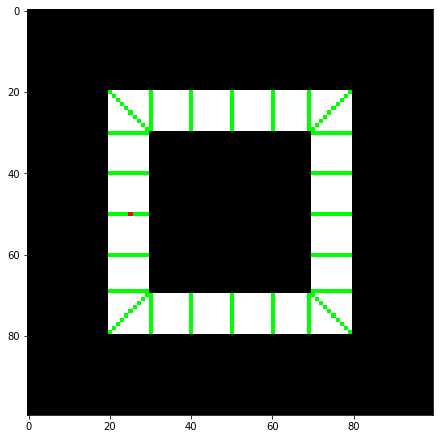

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def display(board):
  fig = plt.figure(figsize = (16, 8))
  fig.add_subplot(1, 2, 1)
  plt.imshow(board)
  plt.show()

# Constant
H, W = 100, 100
COLOR = dict()
COLOR['BLACK'] = np.array([0, 0, 0], dtype='uint8')
COLOR['WHITE'] = np.array([255, 255, 255], dtype='uint8')

COLOR['RED'] = np.array([255, 0, 0], dtype='uint8')
COLOR['MAGENTA'] = np.array([255, 0, 255], dtype='uint8')
COLOR['YELLOW'] = np.array([255, 255, 0], dtype='uint8')
COLOR['GREEN'] = np.array([0, 255, 0], dtype='uint8')
COLOR['BLUE'] = np.array([0, 0, 255])
COLOR['GRAY'] = np.array([169, 169, 169], dtype='uint8')

# Generate board
BOARD = np.full((H, W, 3), 1, dtype='uint8')
BOARD *= COLOR['BLACK']
BOARD[20:30, 20:80] = COLOR['WHITE']
BOARD[20:80, 20:30] = COLOR['WHITE']
BOARD[70:80, 20:80] = COLOR['WHITE']
BOARD[20:80, 70:80] = COLOR['WHITE']

# Generate Checkpoint
for x in [60, 69]:
  BOARD[x, 20: 30] = COLOR['GREEN']

CORNER_1_X = np.array([range(70,80)])
CORNER_1_Y = np.array([range(29,19,-1)])
BOARD[CORNER_1_X, CORNER_1_Y] = COLOR['GREEN']
for y in [30, 40, 50, 60, 69]:
  BOARD[70: 80, y] = COLOR['GREEN']

CORNER_2_X = np.array([range(70,80)])
CORNER_2_Y = np.array([range(70,80)])
BOARD[CORNER_2_X, CORNER_2_Y] = COLOR['GREEN']
for x in [69, 60, 50, 40, 30]:
  BOARD[x, 70: 80] = COLOR['GREEN']

CORNER_3_X = np.array([range(29,19,-1)])
CORNER_3_Y = np.array([range(70,80)])
BOARD[CORNER_3_X, CORNER_3_Y] = COLOR['GREEN']
for y in [69, 60, 50, 40, 30]:
  BOARD[20: 30, y] = COLOR['GREEN']

CORNER_4_X = np.array([range(20,30)])
CORNER_4_Y = np.array([range(20,30)])
BOARD[CORNER_4_X, CORNER_4_Y] = COLOR['GREEN']
for x in [30, 40, 50]:
  BOARD[x, 20: 30] = COLOR['GREEN']

# Generate Agent
X = 50
Y = 25
BOARD[X, Y] = COLOR['RED']

display(BOARD)

### Chromosome and Fitnest Calculation

chromosome: ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'L', 'L', 'L', 'U', 'U', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'D', 'D', 'D', 'D']
fittestCount: 16663
collisionCount: 21


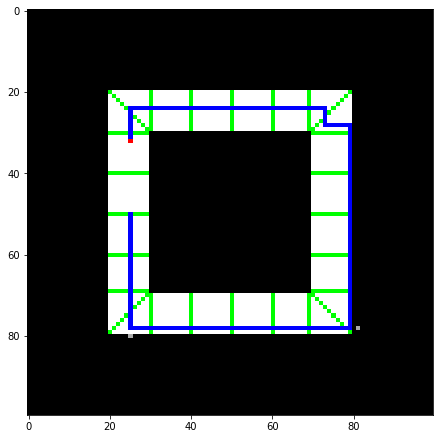

In [58]:
import random

def isCollide(x, y):
  if (np.array_equal(BOARD[x][y], COLOR['BLACK'])):
    return True
  else:
    return False

def isPassed(checkpointArea):
  # print(checkpointArea.shape)
  isMatchPrimitiveColors_1 = (checkpointArea == COLOR['BLUE'])
  isMatchedColors_1 = np.all(isMatchPrimitiveColors_1 == np.array([True, True, True]), axis=1)
  # print(isMatchedColors_1)
  isMatchPrimitiveColors_2 = (checkpointArea == COLOR['RED'])
  isMatchedColors_2 = np.all(isMatchPrimitiveColors_2 == np.array([True, True, True]), axis=1)
  # print(isMatchedColors_2)
  isMatchedColors = np.logical_or(isMatchedColors_1, isMatchedColors_2)
  return np.any(isMatchedColors)

def countFitness(board):
  fittest = 0
  # Checkpoint Group 1
  for x in [60, 69]:
    if isPassed(board[x, 20:30]):
      fittest += 1
    else:
      return fittest
  if isPassed(board[CORNER_1_X, CORNER_1_Y][0]):
    fittest += 1
  else:
    return fittest
  # Checkpoint Group 2
  for y in [30, 40, 50, 60, 69]:
    if isPassed(board[70: 80, y]):
      fittest += 10
    else: return fittest
  if isPassed(board[CORNER_2_X, CORNER_2_Y][0]):
    fittest += 10
  # Checkpoint Group 3
  for x in [69, 60, 50, 40, 30]:
    if isPassed(board[x, 70: 80]):
      fittest += 100
    else: return fittest
  if isPassed(board[CORNER_3_X, CORNER_3_Y][0]):
    fittest += 100
  # Checkpoint Group 4
  for y in [69, 60, 50, 40, 30]:
    if isPassed(board[20: 30, y]):
      fittest += 1000
    else: return fittest
  if isPassed(board[CORNER_4_X, CORNER_4_Y][0]):
    fittest += 1000
  # Checkpoint Group 5
  for x in [30, 40, 50]:
    if isPassed(board[x, 20:30]):
      fittest += 10000
    else: return fittest
  return fittest


# When chromosome is collided, the agent shouldn't be out of the map.
# testCase1_1 = ['R','R','R','R','R','R','R']
# testCase1_2 = ['L','L','L','L','L','L','L']
# When chromosome passed through checkpoints, the fittest should be increment.
# testCase2_1 = ['D','D','D','D','D','D','D','D','D','D','D']
# testCase2_2 = ['U','U','U','U','U','U','U','U','U','U','U','U'] expect to return 0
# testCase2_3 = ['D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D'] expect to return 1
# testCase2_4 = ['D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D'] expect to return 2
# testCase2_5 = ['D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D'] expect to return 3
# testCase2_6 = ['D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','R','R','R','R','R'] expect to return 4
# testCase2_7 = ['D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','R','R','R','R','R',
              # 'R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R'] expect to return 7
# testCase2_8 = ['D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D',
              # 'R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R',
              # 'R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R',
              # 'R','R','R','R','R','R','R','R','R','R','R','R','U','U','U','U','U','U','U','U','U','U','U','U',
              # 'U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U',
              # 'U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U',
              # 'L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L',
              # 'L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L',
              # 'L','L','L','L','L','L','L','L','L','L','L','L','L','L','D','D','D','D','D','D','D','D','D','D',
              # 'D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D'] expect to return 24

def evaluate(chromosome):
  STEP_DISTANCE = 2
  collisionCount = 0
  board = BOARD.copy()
  x = X
  y = Y
  for genome in chromosome:
    if (genome == 'D'):
      if (not isCollide(x+STEP_DISTANCE, y)):
        for i in range(STEP_DISTANCE):
          board[x, y] = COLOR['BLUE']
          x += 1
      else:
        board[x+STEP_DISTANCE, y] = COLOR['GRAY']
        collisionCount += 1

    elif (genome == 'U'):
      if (not isCollide(x-STEP_DISTANCE, y)):
        for i in range(STEP_DISTANCE):
          board[x, y] = COLOR['BLUE']
          x -= 1
      else:
        board[x-STEP_DISTANCE, y] = COLOR['GRAY']
        collisionCount += 1

    elif (genome == 'R'):
      if (not isCollide(x, y+STEP_DISTANCE)):
        for i in range(STEP_DISTANCE):
          board[x, y] = COLOR['BLUE']
          y += 1
      else:
        board[x, y+STEP_DISTANCE] = COLOR['GRAY']
        collisionCount += 1

    elif (genome == 'L'):
      if (not isCollide(x, y-STEP_DISTANCE)):
        for i in range(STEP_DISTANCE):
          board[x, y] = COLOR['BLUE']
          y -= 1
      else:
        board[x, y-STEP_DISTANCE] = COLOR['GRAY']
        collisionCount += 1
  board[x, y] = COLOR['RED']
  fittestCount = countFitness(board)
  obj = dict()
  obj['board'] = board
  obj['fittestCount'] = fittestCount
  obj['collisionCount'] = collisionCount
  return obj

# Output
inputChromosome = ['D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','D','R','R','R','R','R',
                   'R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R','R',
                   'R','R','R','R','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U','U',
                   'L','L','L','U','U','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L','L',
                   'D','D','D','D']
obj =  evaluate(inputChromosome)
print('chromosome:',inputChromosome)
print('fittestCount:', obj['fittestCount'])
print('collisionCount:', obj['collisionCount'])
display(obj['board'])


### Genetic Algorithm


GENERATION  0
33 LDLUDDRRDDDUUDDLURLDRRRRLDUDDLDLLRRLULLDRDUDRULURULDDDDRDURURDRDRRRLURLUDRURRRUDDLURLURLLLLDULRLDRRLLRUULDDDRRDLRRUUDURLLRDUDLRLRURRDULUDRURRRRULLLRLLDUDRDDDLLDRDDLRURLRRDLRUDULUDULUDRDDUUDRDRLLDLLLLR

GENERATION  1
53 UDULDULLDULRLDRLRDLLRULDDLLULRRDLLLURDDDRLUDRLDRDRULRDRLRLRDULDDUDURLRLRURURRRDRULRURDDLDUDUUUDULRRLRRLDUDDDUDLLLLRRDDLURDLRURDRDRRRLRURRUDDUDRRLURUDRUDRDLDDDRUDDRUDRDDRDUUDLRDDRDRRDLRDURURDRRURRLLLLD

GENERATION  2
63 ULURUDULURDDRDLRULDRDRLUUUDRDULDDLRDDLRULDRLLDLLUUDDLDDURDRDRDDDULLURDUDDDDRDLDUDUUUDRLUDRDLDDDDDUULLDDRRDLLRRDLRLRRDDLURDDRURDRDRRRLRUURUDDUDRRLURUDRUDRDLRDDRUDDRUDRDDRDDUDLRDDRDRRDLRDURURDRRURRLLLLD

GENERATION  3
63 LDRUUUDRRLLDRDLRULDRDRLUUUDRDULDDLRDDLRULDRLUDLLUUDDLDDURDRDRDDRULLURDUDDDDRDLDUDUUUDRLUDRDLDDRDDUULLDDRRDLLRRRLRLRRDLLURDDRURURDRRRLRUURRDDUDRRLURUDRUDRDLRDDRUDLRUDRDDRDDUDLRDDRDRRRLRDURURDRRURRLLLLD

GENERATION  4
63 RDRUUUDRRLLDRDLRULDRDRLUUUDRDULDDLRDDLRULDRLUDLLUUDDLDDURDRDRDDRULLURDUDDDDRDLDUDUUUDRLUDRDLLDRDDUULLDURRD

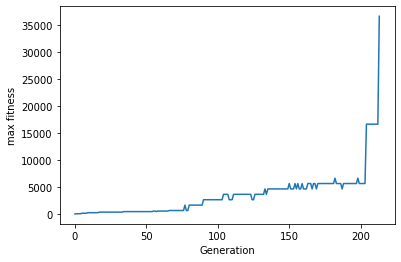

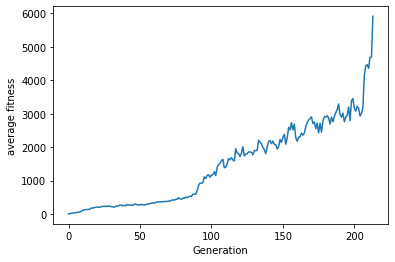

In [59]:
# CONFIGURATION
CHROMOSOME_LENGTH = 200
POPULATION_NUMBER = 100
GENERATION_NUMBER = 500
MUTATION_RATE = 3
GENOME_LIST = ['U','D','L','R']

def newGenome():
  return GENOME_LIST[random.randint(0, 3)]

def isMutated():
  return random.randint(1, 100) <= MUTATION_RATE

def createRandomChromosome(length):
  chromosome = []
  for i in range(length):
    chromosome.append(newGenome())
  return chromosome

def toString(chromosome):
  s = ''
  for c in chromosome:
    s += c
  return s

def initialPopultation():
  population = []
  for i in range(POPULATION_NUMBER):
    population.append(createRandomChromosome(CHROMOSOME_LENGTH))
  return population  

def crossOver(chromosomeA, chromosomeB):
  crossOverPoint = random.randint(0, CHROMOSOME_LENGTH)
  # print('crossOverPoint: ', crossOverPoint)
  newChromosomeA = chromosomeA[0:crossOverPoint] + chromosomeB[crossOverPoint:CHROMOSOME_LENGTH]
  newChromosomeB = chromosomeB[0:crossOverPoint] + chromosomeA[crossOverPoint:CHROMOSOME_LENGTH]
  return newChromosomeA, newChromosomeB

# Initial population
population = initialPopultation()
maxFitness = []
avgFitness = []
for k in range(GENERATION_NUMBER):
  print("\nGENERATION ", k)
  # Fitness function
  populationObj = []
  sumFitness = 0
  for i in range(POPULATION_NUMBER):
    obj = evaluate(population[i])
    obj['chromosome'] = population[i]
    populationObj.append(obj)
    sumFitness += obj['fittestCount']
  avgFitness.append(sumFitness/POPULATION_NUMBER)
  # print('sumFitness:', sumFitness)

  # Sorted Fitness function
  candidate = []
  sortedPopulationObj = sorted(populationObj, key = lambda i: (i['fittestCount'], -i['collisionCount']),reverse=(True))
  print(sortedPopulationObj[0]['fittestCount'], toString(sortedPopulationObj[0]['chromosome']))
  maxFitness.append(sortedPopulationObj[0]['fittestCount'])
  # display(sortedPopulationObj[0]['board'])
  if (sortedPopulationObj[0]['fittestCount'] == 36663):
    break
  for i in range(POPULATION_NUMBER):
    for j in range(sortedPopulationObj[i]['fittestCount']):
      candidate.append(sortedPopulationObj[i]['chromosome'])
    # print(sortedPopulationObj[i]['fittestCount'], toString(sortedPopulationObj[i]['chromosome']))
    

  # Selection
  # print("\nSelection")
  newPopulation = []
  for i in range(POPULATION_NUMBER):
    randomCandidate = candidate[random.randint(0, sumFitness-1)]
    newPopulation.append(randomCandidate)
    # print(toString(newPopulation[i]))

  # Crossover
  # print("\nCrossover")
  for i in range(0, POPULATION_NUMBER, 2):
    newPopulation[i], newPopulation[i+1] = crossOver(newPopulation[i], newPopulation[i+1])
    # print(toString(newPopulation[i]))
    # print(toString(newPopulation[i+1]))

  # Mutation
  # print("\nMutation")
  for i in range(POPULATION_NUMBER):
    for j in range(CHROMOSOME_LENGTH):
      if(isMutated()):
        newPopulation[i][j] = newGenome()
    # print(toString(newPopulation[i]))

  population = newPopulation

plt.plot(maxFitness)
plt.ylabel('max fitness')
plt.xlabel('Generation')
plt.show()

plt.plot(avgFitness)
plt.ylabel('average fitness')
plt.xlabel('Generation')
plt.show()
